In [59]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [61]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [63]:
len(X_train)

60000

In [65]:
len(X_test)

10000

In [67]:
X_train[0].shape

(28, 28)

In [69]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

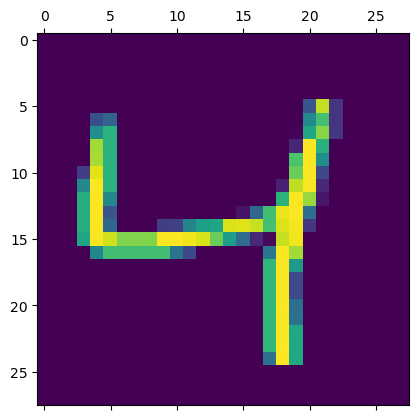

In [71]:
plt.matshow(X_train[2])
plt.show()

In [73]:
y_train[2]

4

In [75]:
X_train = X_train / 255
X_test = X_test / 255

In [79]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_f = X_train.reshape(len(X_train),28*28)
X_test_f = X_test.reshape(len(X_test),28*28)

In [11]:
X_test_f.shape

(10000, 784)

In [12]:
# Define the model
model = Sequential([
    Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming X_train and y_train are your training data
model.fit(X_train_f, y_train, epochs=5)

C:\Users\NallamSaiRahul\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8147 - loss: 0.7208
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9132 - loss: 0.3149
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9213 - loss: 0.2804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9224 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9278 - loss: 0.2594


In [13]:
 model.evaluate(X_test_f, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9160 - loss: 0.3034


[0.2674616873264313, 0.9272000193595886]

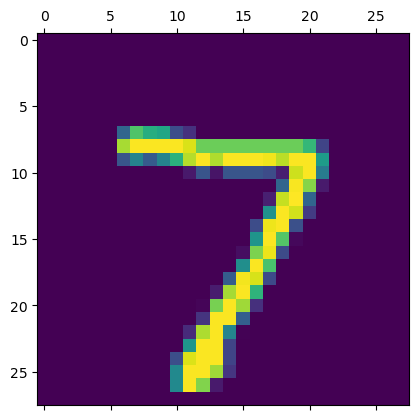

In [14]:
plt.matshow(X_test[0])
plt.show()

In [15]:
y_pre = model.predict(X_test_f)
y_pre[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


array([1.8836951e-02, 3.7001183e-07, 7.9736657e-02, 9.3454027e-01,
       1.8658956e-03, 1.0603843e-01, 1.0506304e-06, 9.9974024e-01,
       1.0527928e-01, 7.0139867e-01], dtype=float32)

In [16]:
np.argmax(y_pre[0])

7

In [17]:
np.argmax(y_pre[1])

2

In [18]:
y_pre_labels = [np.argmax(i) for i in y_pre]
y_pre_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pre_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,   10,    5,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    8,  935,   11,    6,    3,   11,    9,   40,    5],
       [   3,    0,   28,  905,    1,   31,    2,    9,   21,   10],
       [   1,    1,    9,    0,  906,    0,    9,    4,   10,   42],
       [   8,    2,    6,   19,    7,  800,   10,    3,   30,    7],
       [  11,    3,   13,    1,    7,   15,  903,    2,    3,    0],
       [   1,    5,   26,    4,    5,    1,    0,  941,    3,   42],
       [   4,    6,    7,   19,    9,   28,    8,    8,  877,    8],
       [   9,    6,    2,    9,   19,    8,    0,   12,    5,  939]])>

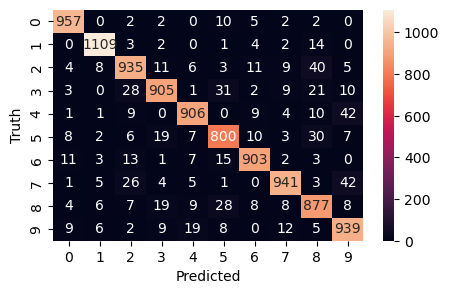

In [21]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [22]:


# Define the model
model = Sequential([
    Dense(100, input_shape=(784,), activation='relu'),
    Dense(10, activation='sigmoid')  # Changed to softmax for multi-class
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model (assuming X_train and y_train are defined)
model.fit(X_train_f, y_train, epochs=5)

C:\Users\NallamSaiRahul\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8647 - loss: 0.4703
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9623 - loss: 0.1310
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9846 - loss: 0.0504


In [23]:
 model.evaluate(X_test_f, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0868


[0.07376778870820999, 0.9779999852180481]

In [24]:
y_p = model.predict(X_test_f)
y_p_l = [np.argmax(i) for i in y_p]
conmat = tf.math.confusion_matrix(labels=y_test,predictions=y_p_l)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


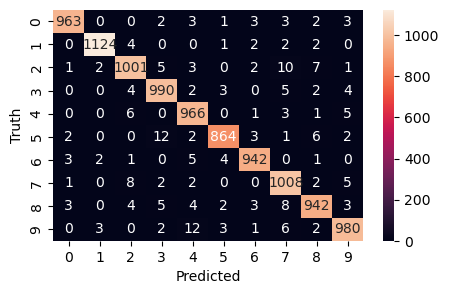

In [25]:
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(conmat, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [26]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')  # Changed to softmax for multi-class
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model (assuming X_train and y_train are defined)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5


C:\Users\NallamSaiRahul\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8768 - loss: 0.4378
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9625 - loss: 0.1276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9754 - loss: 0.0852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0629
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0480
